In [49]:
from fastai.tabular.all import *

In [50]:
path = Path('../input/titanic')

In [51]:
path.ls()

(#3) [Path('../input/titanic/train.csv'),Path('../input/titanic/gender_submission.csv'),Path('../input/titanic/test.csv')]

In [52]:
train_df = pd.read_csv(path/'train.csv')

In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
cat_names = ['Pclass','Sex', 'Name', 'SibSp', 'Parch','Embarked','Cabin'] # not 'Ticket'
cont_names = ['Age', 'Fare']

In [56]:
splits = RandomSplitter()(range_of(train_df))

In [57]:
splits

((#713) [787,413,864,713,497,856,775,211,792,287...],
 (#178) [520,511,539,390,298,300,877,486,712,285...])

In [58]:
len(train_df)

891

In [59]:
procs = [FillMissing, Categorify, Normalize]

In [60]:
y_names = 'Survived'
y_block = CategoryBlock()

In [61]:
to = TabularPandas(train_df, procs=procs, cat_names=cat_names, cont_names=cont_names, y_names=y_names, y_block=y_block, splits=splits)

In [62]:
dls = to.dataloaders()

In [63]:
dls.show_batch()

,Pclass,Sex,Name,SibSp,Parch,Embarked,Cabin,Age_na,Age,Fare,Survived
0,2,male,"Milling, Mr. Jacob Christian",0,0,S,#na#,False,47.999999,13.000000,0
1,3,male,"Elias, Mr. Dibo",0,0,C,#na#,True,28.750000,7.224999,0
2,2,female,"Angle, Mrs. William A (Florence ""Mary"" Agnes Hughes)",1,0,S,#na#,False,36.000000,26.000000,1
3,3,male,"Celotti, Mr. Francesco",0,0,S,#na#,False,24.000000,8.050000,0
4,1,male,"Daniel, Mr. Robert Williams",0,0,S,#na#,False,27.000000,30.500000,1
5,1,male,"Holverson, Mr. Alexander Oskar",1,0,S,#na#,False,42.000000,52.000000,0
6,3,male,"Skoog, Mr. Wilhelm",1,4,S,#na#,False,40.000000,27.900000,0
7,3,male,"Olsen, Mr. Henry Margido",0,0,S,#na#,False,28.000000,22.524999,0
8,3,female,"Cacic, Miss. Marija",0,0,S,#na#,False,30.000000,8.662501,0
9,3,female,"Rice, Mrs. William (Margaret Norton)",0,5,Q,#na#,False,39.000000,29.125000,0


In [64]:
trn_dl = TabDataLoader(to.train,bs=64, shuffle=True, drop_last=True)
val_dl = TabDataLoader(to.valid, bs=128)

In [66]:
dls = DataLoaders(trn_dl, val_dl)
dls.show_batch()

,Pclass,Sex,Name,SibSp,Parch,Embarked,Cabin,Age_na,Age,Fare,Survived
0,3,male,"Thomas, Master. Assad Alexander",0,1,C,#na#,False,0.419999,8.516700,1
1,1,male,"Marvin, Mr. Daniel Warner",1,0,S,D30,False,19.000000,53.099998,0
2,3,male,"Flynn, Mr. James",0,0,Q,#na#,True,28.750000,7.749999,0
3,1,male,"Foreman, Mr. Benjamin Laventall",0,0,C,C111,False,30.000000,27.750000,0
4,1,female,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",1,0,C,#na#,False,54.000000,59.400003,1
5,3,male,"Hedman, Mr. Oskar Arvid",0,0,S,#na#,False,27.000000,6.975000,1
6,2,male,"Butler, Mr. Reginald Fenton",0,0,S,#na#,False,25.000000,13.000000,0
7,3,male,"Barton, Mr. David John",0,0,S,#na#,False,22.000000,8.050000,0
8,2,male,"Renouf, Mr. Peter Henry",1,0,S,#na#,False,34.000000,21.000000,0
9,3,male,"Allen, Mr. William Henry",0,0,S,#na#,False,35.000000,8.050000,0


In [48]:
dls._dbunch_type

fastai.tabular.data.TabularDataLoaders

In [40]:
learn = tabular_learner(dls, [200,100],metrics=accuracy)

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=6.309573450380412e-07)

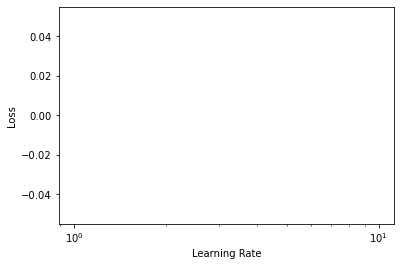

In [41]:
learn.lr_find()

In [43]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,nan,nan,0.634831,00:00
1,nan,nan,0.634831,00:00
2,nan,nan,0.634831,00:00


In [44]:
dls = to.dataloaders(bs=1024)

In [45]:
learn = tabular_learner(dls, [200,100], metrics=accuracy)

In [46]:
learn.lr_find()

ZeroDivisionError: integer division or modulo by zero